In [43]:
def linear(x, m, b):
    return m*x + b
def quadratic(x, a, b, c):
    return (a * x * x) + (b * x) + c
def cubic(x, a, b, c, d):
    return (a * x**3) + (b * x**2) + (c * x) + d
def sine(x, A_sin, f, C_sin, d):
    return A_sin * np.sin((2 * np.pi * f * x) + C_sin) + d 

def cosine(x, A_cos, f, C_cos, d):
    return A_cos * np.cos((2 * np.pi * f * x) + C_cos) + d 

def exponential(x, A_exp, b):
    return A_exp * np.exp(b * x)
def powerlaw(x, A_pow, alpha):
    return A_pow * (np.power(x, -alpha))

def gaussian(x, mean, stdev):
    return (1/np.sqrt(2 * np.pi * stdev**2)) * np.exp(-(x - mean)**2 / (2*stdev**2))

def logistic(x, A_log, k, x0):
    return A_log/(1 + np.exp(-k * (x - x0)))

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

In [77]:
data_3 = pd.read_csv('fit_data3.csv')
x = data_3['x'].to_numpy()
y = data_3['y'].to_numpy()


[1.81017574 0.2996899  1.41150587 0.10287076 0.21657121 3.08790124]
ssr: 4118.694756033954


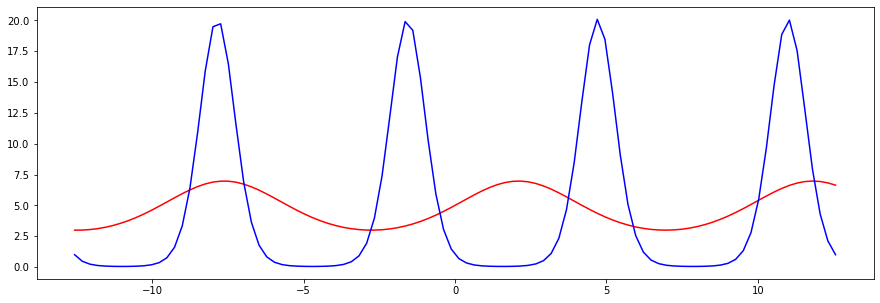

In [102]:
def exponential_of_sine(x, A_exp,b,A_sin,f,C_sin,d):
    return  A_exp * np.exp(b * (A_sin * np.sin((2 * np.pi * f * x) + C_sin) + d ))

def exponential_of_cosine(x,A_exp,b, A_cos, f, C_cos, d):
    return A_exp * np.exp(b * (A_cos * np.cos((2 * np.pi * f * x) + C_cos) + d ))

popt,pcov = curve_fit(exponential_of_sine,x,y,p0=[0.7,1,1,0.1,0,0])
#p0=[2.7,1,1,0.1,0,0]
print(popt)

ssr = sum((y-exponential_of_sine(x,*popt))**2)

print("ssr:",ssr)
x_range = np.linspace(min(x),max(x),100)

plt.plot(x_range,exponential_of_sine(x_range,*popt),'r-')
plt.plot(x,y,'b-')


plt.show()

In [28]:
list_of_functions = [cubic, sine,exponential, powerlaw,gaussian,logistic]

try_1 = list_of_functions[0](2,3,4,5,6) 
try_1
# popt,pcov = curve_fit(list_of_functions[0],x,y)


56

In [ ]:
from itertools import combinations
comb = combinations(list_of_functions, 2)

for i in comb:
    print (i[0])

In [ ]:
fxnDict['linear'] = {'parameters' : 'linear_m, linear_constant',
                    'function' : '(linear_m * x + linear_constant)'}
fxnDict['quadratic'] = {'parameters' : 'quad_a, quad_b, quad_constant',
                    'function' : '((quad_a * x * x) + (quad_b * x) + quad_constant)'}
fxnDict['cubic'] = {'parameters' : 'cubic_a, cubic_b, cubic_c, cubic_constant',
                    'function' : '((cubic_a * x * x * x) + (cubic_b * x * x) + (cubic_c * x) + cubic_constant)'}
fxnDict['sine'] = {'parameters' : 'sine_A, sine_f, sine_C, sine_constant',
                    'function' : '(sine_A * np.sin((2 * np.pi * sine_f * x)+ sine_C)+sine_constant)'}
fxnDict['cos'] = {'parameters' : 'cos_A, cos_f, cos_C, cos_constant',
                    'function' : '(cos_A * np.cos((2 * np.pi * cos_f * x)+ cos_C)+cos_constant)'}
fxnDict['exponential'] = {'parameters' : 'exp_A, exp_b',
                    'function' : '(exp_A * np.exp(-exp_b * x))'}
fxnDict['powerlaw'] = {'parameters' : 'pl_A, pl_alpha',
                    'function' : '(pl_A * (np.power(x, -pl_alpha)))'}
fxnDict['gaussian'] = {'parameters' : 'gaus_mean, gaus_stdev',
                    'function' : '(1/np.sqrt(2 * np.pi * gaus_stdev**2)) * np.exp(-(x - gaus_mean)**2 / (2*gaus_stdev**2))'}
fxnDict['logistic'] = {'parameters' : 'sigm_A, sigm_k, sigm_x0',
                    'function' : '(sigm_A/(1 + np.exp(-sigm_k * (x - sigm_x0))))'}

In [ ]:
def generate_functions(modes, template_string = ''):
    if len(modes) != len(set(modes)):
        unique_params = []
        params_to_append = []
        fxns_to_append = []
        count = 1
        for s in modes:
            print(count)
            parameters = fxnDict[s]['parameters']
            fxn = fxnDict[s]['function']
            if parameters not in unique_params:
                unique_params.append(parameters)
                params_to_append.append(parameters)
                fxns_to_append.append(fxn)
            elif parameters in unique_params:
                a = parameters.split(', ')
                b = [p+f'_{count}' for p in a]
                swap = dict(zip(a,b))
                for key in swap.keys():
                    fxn = fxn.replace(key,swap[key])
                params_to_append.append(', '.join(b))
                fxns_to_append.append(fxn)
                count +=1
    else:
        params_to_append = [fxnDict[mode]['parameters'] for mode in modes]
        fxns_to_append = [fxnDict[mode]['function'] for mode in modes]
        
    parameter_string = ','.join(['x'] + params_to_append)
    
    if template_string:
        fxn_string = template_string % tuple(fxns_to_append)
    elif not template_string:
        fxn_string = '+'.join(fxns_to_append)
        
    return f"def custom_function({parameter_string}) : return {fxn_string}"

In [ ]:
#sample template
template = '(%s + %s)/%s'

#Define the function
#Note: Generated function is named as custom_function
modes = ['linear','linear','quadratic']
exec(generate_functions(modes,template_string = template)) 

popt,pcov = curve_fit(custom_function,x,y)
ssr = sum((y-custom_function(x,*popt))**2)
print(*popt)
print(ssr)

In [106]:
template = '(%s + %s)/%s'
template

'(%s + %s)/%s'